In [11]:
from itertools import combinations, chain
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.svm import SVC
from scipy.stats import linregress
from sklearn.datasets import load_digits
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
%matplotlib inline
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,County,Poor_Health_Status,Students_Not_Completing_High_School,College_Prep_Courses,At_Risk_Sibling_Abused,Caretaker_Absence_Incapacity,Emotional_Abuse,General_Neglect,Physical_Abuse,Severe_Neglect,Sexual_Abuse,Substantial_Risk,Availability_Of_Child_Care,Hospitalizations_for_Mental_Health
0,California,5.3,10.7,0.419,0.137,0.015,0.089,0.465,0.192,0.017,0.085,0,0.25,5.1
1,Alameda County,6.9,9.6,0.534,0.000,0.048,0.132,0.303,0.349,0.027,0.140,0,0.31,5.5
2,Amador County,3.4,9.5,0.260,0.030,0.008,0.140,0.407,0.273,0.021,0.121,0,0.24,4.6
3,Butte County,8.3,9.0,0.309,0.003,0.030,0.142,0.606,0.117,0.013,0.089,0,0.26,4.9
4,Calaveras County,3.4,3.6,0.303,0.027,0.017,0.057,0.752,0.126,0.002,0.019,0,0.30,4.9


In [5]:
from scipy import stats

In [6]:
df["Physical_Abuse"] = df["Physical_Abuse"]*100

In [8]:
def plot(x,y,x_label,y_label, name):
    figure = plt.figure(figsize = (20,15))
    ax = figure.add_subplot(1,1,1)
    ax.tick_params(axis = 'y', labelsize = 25)
    ax.tick_params(axis='x', labelsize=25)
    ax.scatter(x,y, color = 'b', s = 150)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    line = slope*x+intercept
    plt.plot(x,line, c = 'r')
    print(linregress(x,y))
    plt.xlabel(x_label, fontsize = '30')
    plt.ylabel(y_label, fontsize = '30')
    figure.suptitle(y_label+" in Relation to \n" + x_label, fontsize=50)
    figure.savefig(str(name + ".png"), dpi = 300)
    return slope, intercept, r_value, p_value, std_err

In [9]:
x1 = df["Physical_Abuse"][1:]
y1 = df["Hospitalizations_for_Mental_Health"][1:]

LinregressResult(slope=0.076061691455189859, intercept=2.9663901751214996, rvalue=0.32975992622243389, pvalue=0.026957540252554025, stderr=0.03320746241584413)


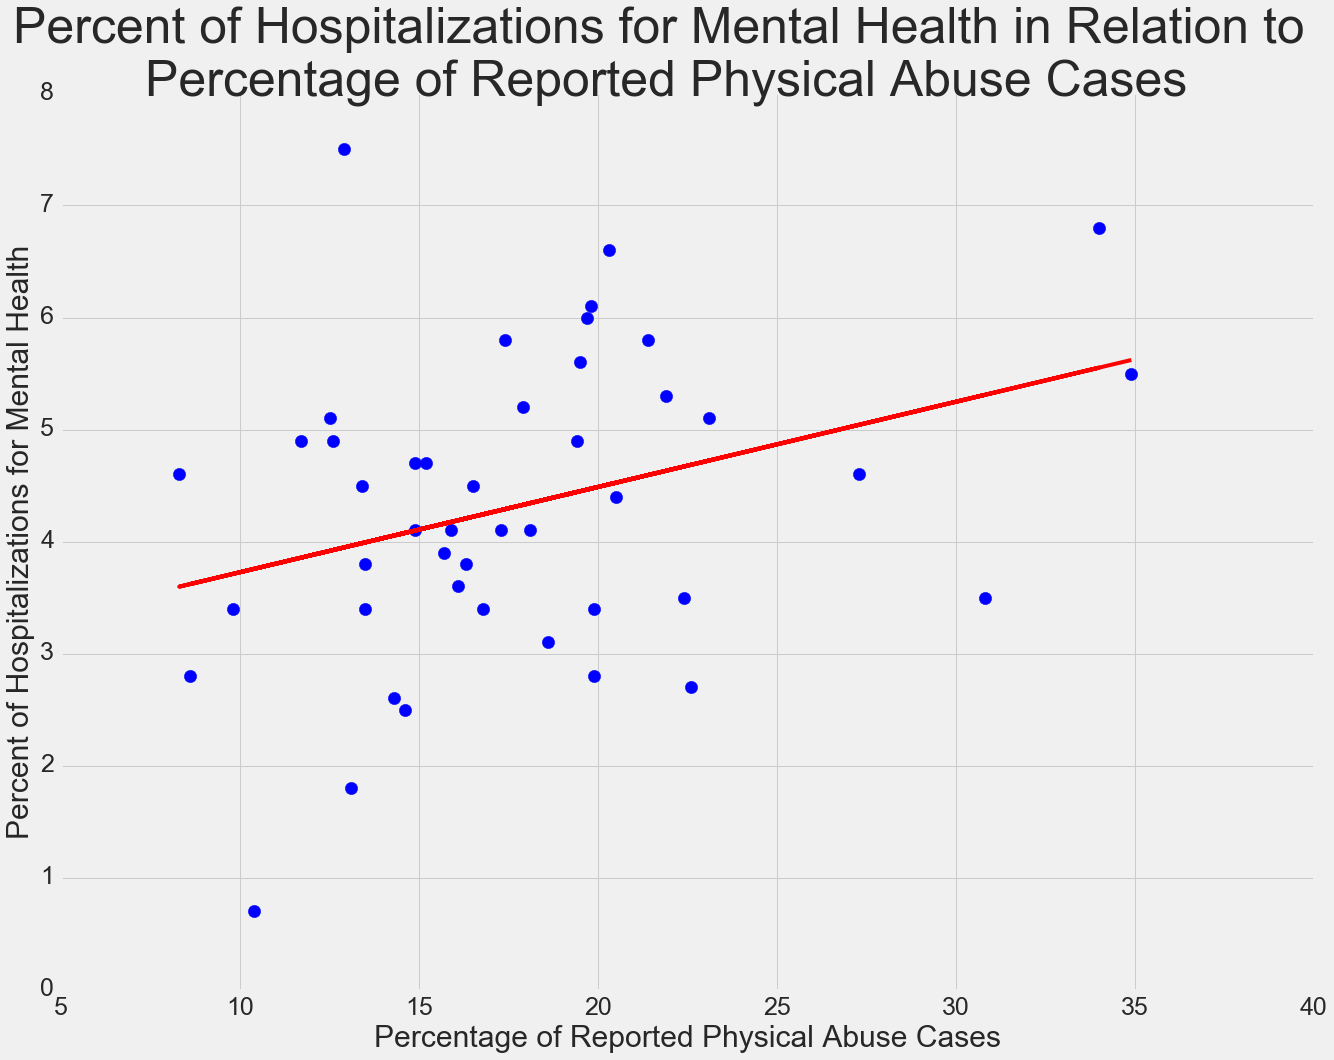

In [12]:
b, a, r, p,s = plot(x1,y1,"Percentage of Reported Physical Abuse Cases", "Percent of Hospitalizations for Mental Health", "plot1")

In [15]:
df.head()

,County,Poor_Health_Status,Students_Not_Completing_High_School,College_Prep_Courses,At_Risk_Sibling_Abused,Caretaker_Absence_Incapacity,Emotional_Abuse,General_Neglect,Physical_Abuse,Severe_Neglect,Sexual_Abuse,Substantial_Risk,Availability_Of_Child_Care,Hospitalizations_for_Mental_Health
0,California,5.3,10.7,0.419,0.137,0.015,0.089,0.465,19.2,0.017,0.085,0,0.25,5.1
1,Alameda County,6.9,9.6,0.534,0.000,0.048,0.132,0.303,34.9,0.027,0.140,0,0.31,5.5
2,Amador County,3.4,9.5,0.260,0.030,0.008,0.140,0.407,27.3,0.021,0.121,0,0.24,4.6
3,Butte County,8.3,9.0,0.309,0.003,0.030,0.142,0.606,11.7,0.013,0.089,0,0.26,4.9
4,Calaveras County,3.4,3.6,0.303,0.027,0.017,0.057,0.752,12.6,0.002,0.019,0,0.30,4.9


LinregressResult(slope=-0.4315288925450787, intercept=7.1689535762723171, rvalue=-0.15666625874426332, pvalue=0.30407268644906199, stderr=0.4148622804140914)


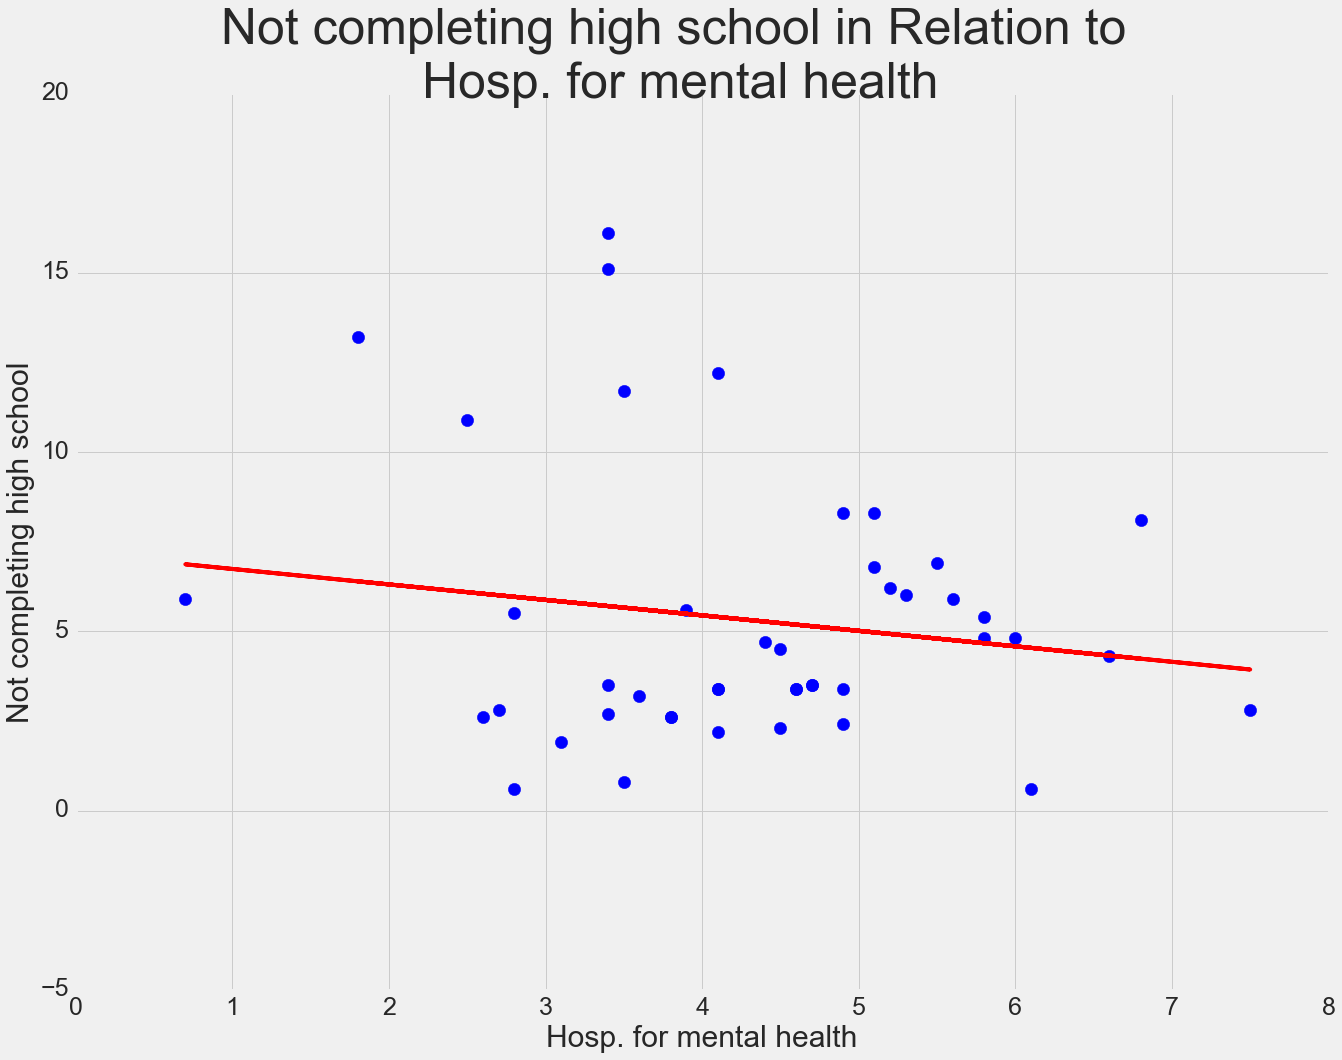

In [25]:
b, a, r, p, s = plot(df["Hospitalizations_for_Mental_Health"][1:], df["Poor_Health_Status"][1:], "Hosp. for mental health", "Not completing high school", "plot1")

LinregressResult(slope=28.887391786280837, intercept=8.0414291030323728, rvalue=0.25655173294665068, pvalue=0.088909973399272341, stderr=16.596431383004273)


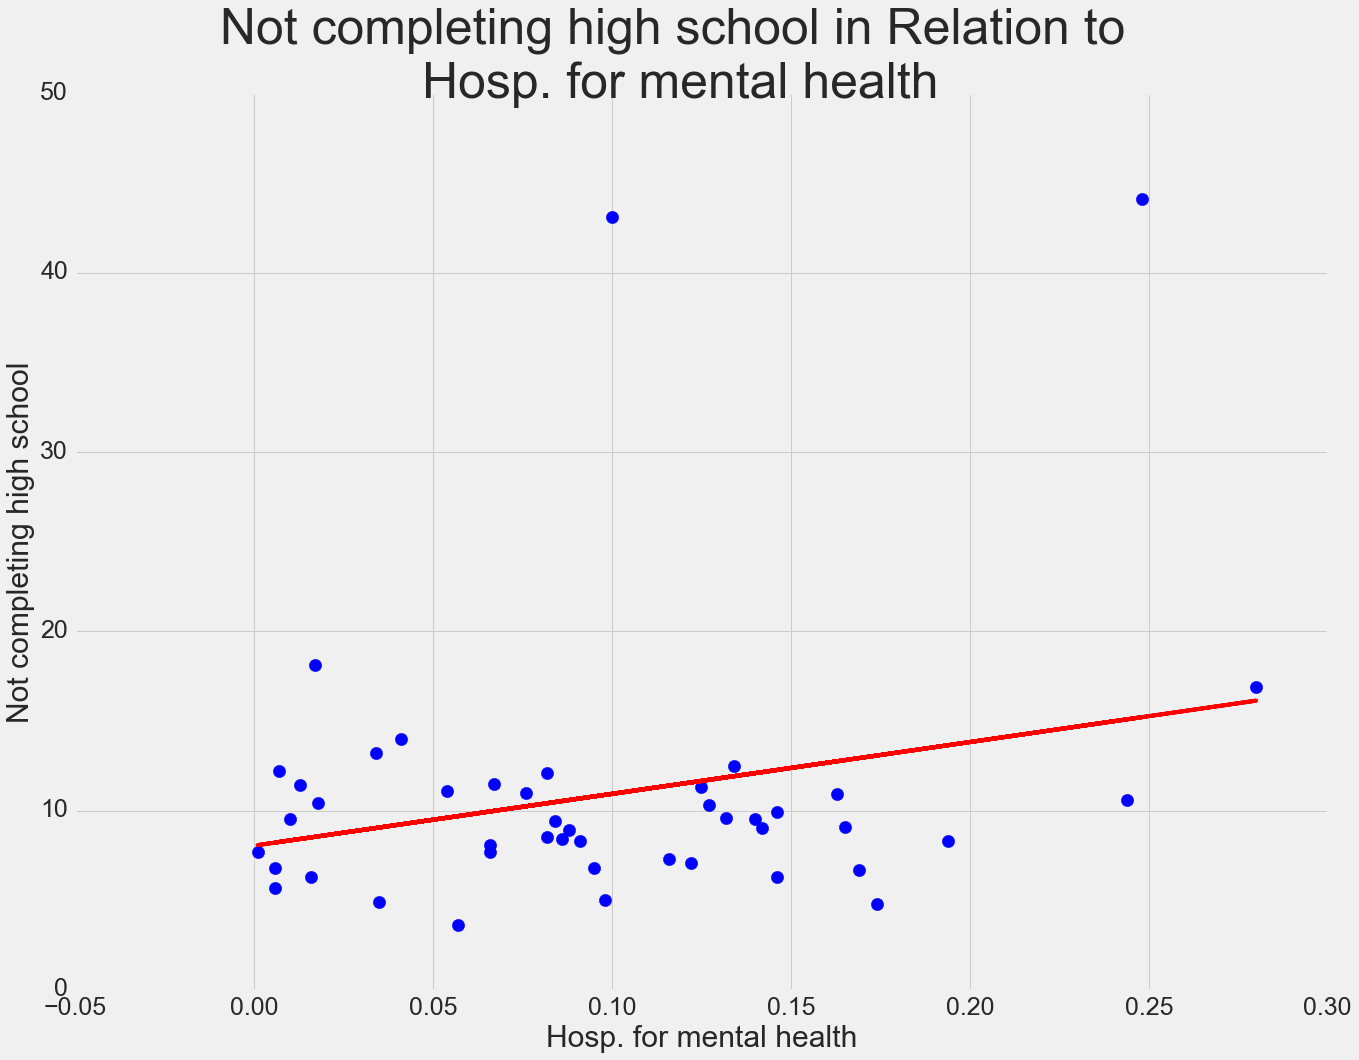

In [23]:
b, a, r, p, s = plot(df["Emotional_Abuse"][1:], df["Students_Not_Completing_High_School"][1:], "Hosp. for mental health", "Not completing high school", "plot1")

In [13]:
x2 = df["Emotional_Abuse"][1:]
y2 = df["Physical_Abuse"][1:]

LinregressResult(slope=15.643165200835979, intercept=16.221086005083389, rvalue=0.1838439418737286, pvalue=0.22670325793265658, stderr=12.75483700072656)


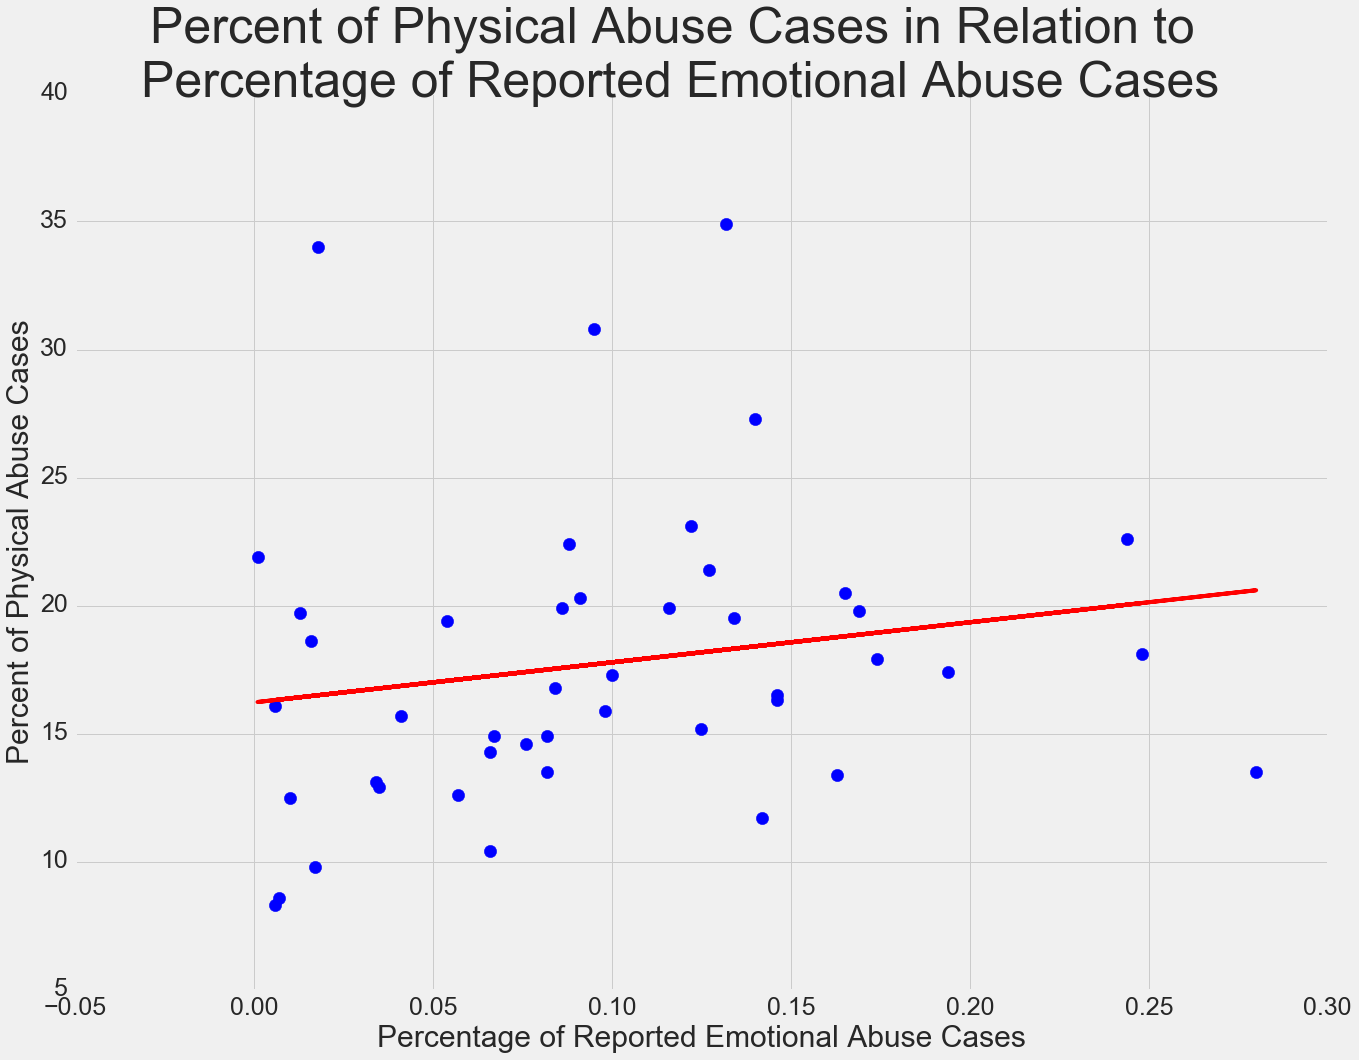

In [14]:
b, a, r, p,s = plot(x2,y2,"Percentage of Reported Emotional Abuse Cases", "Percent of Physical Abuse Cases", "plot1")

In [11]:
x3 = df["Physical_Abuse"][1:]
y3 = df["Sexual_Abuse"][1:]

LinregressResult(slope=0.0020583222782059531, intercept=0.044334381278577958, rvalue=0.44341931048759842, pvalue=0.0022826852945166329, stderr=0.00063449012513350548)


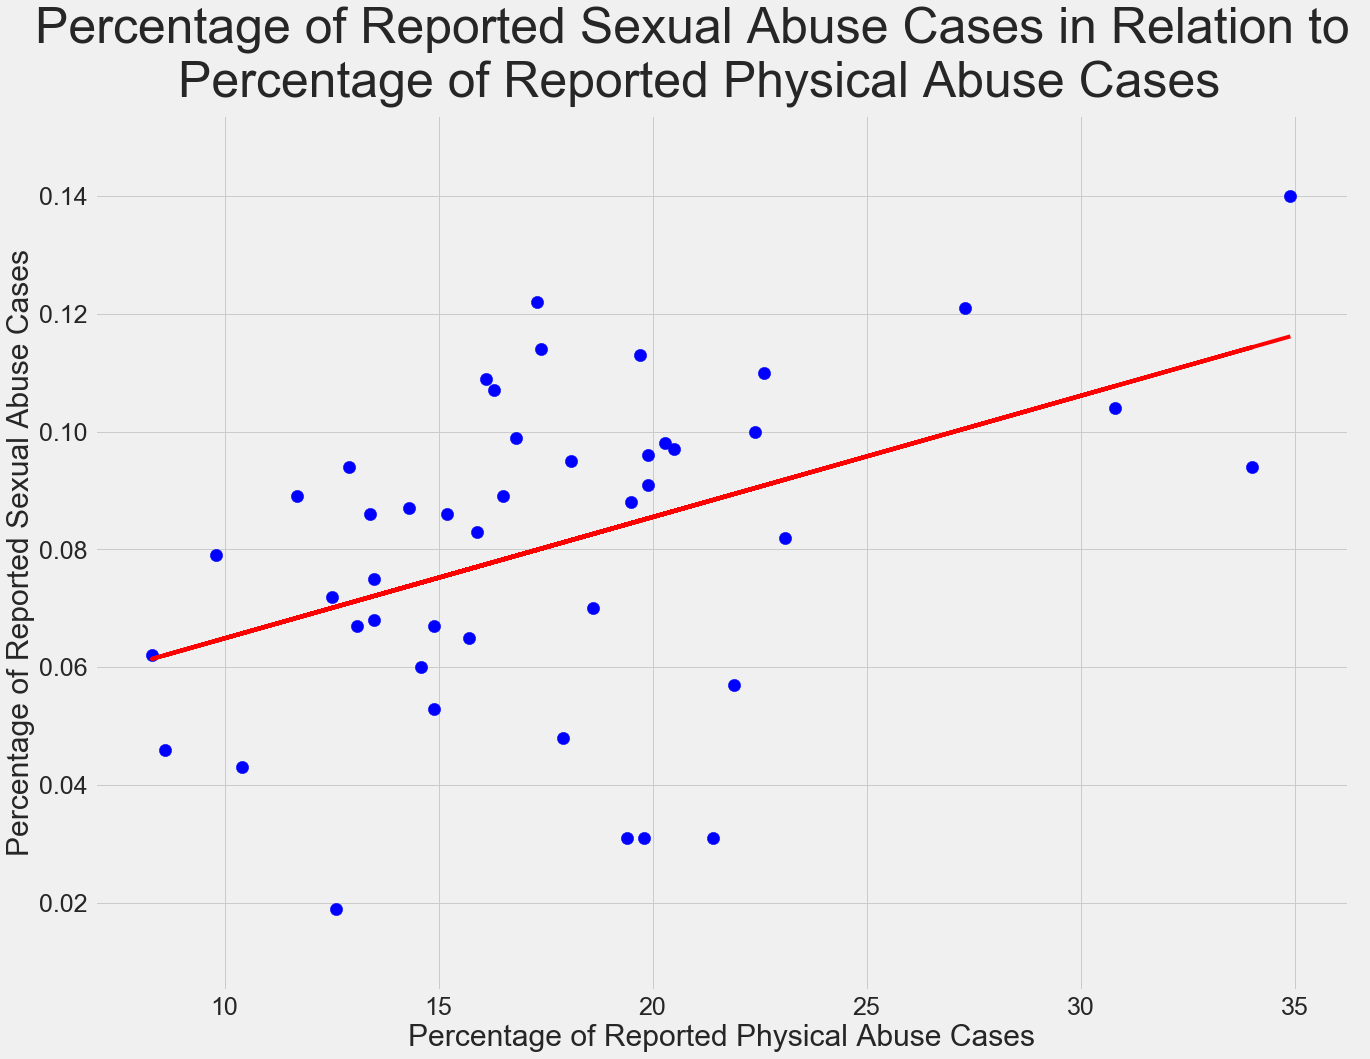

In [12]:
b, a, r, p,s = plot(x3,y3,"Percentage of Reported Physical Abuse Cases", "Percentage of Reported Sexual Abuse Cases", "plot1")

In [13]:
x4 = df["Emotional_Abuse"][1:]
y4 = df["Sexual_Abuse"][1:]

LinregressResult(slope=0.092122946928842556, intercept=0.071912612945543547, rvalue=0.23323501011705611, pvalue=0.12309480137930662, stderr=0.058572520510274062)


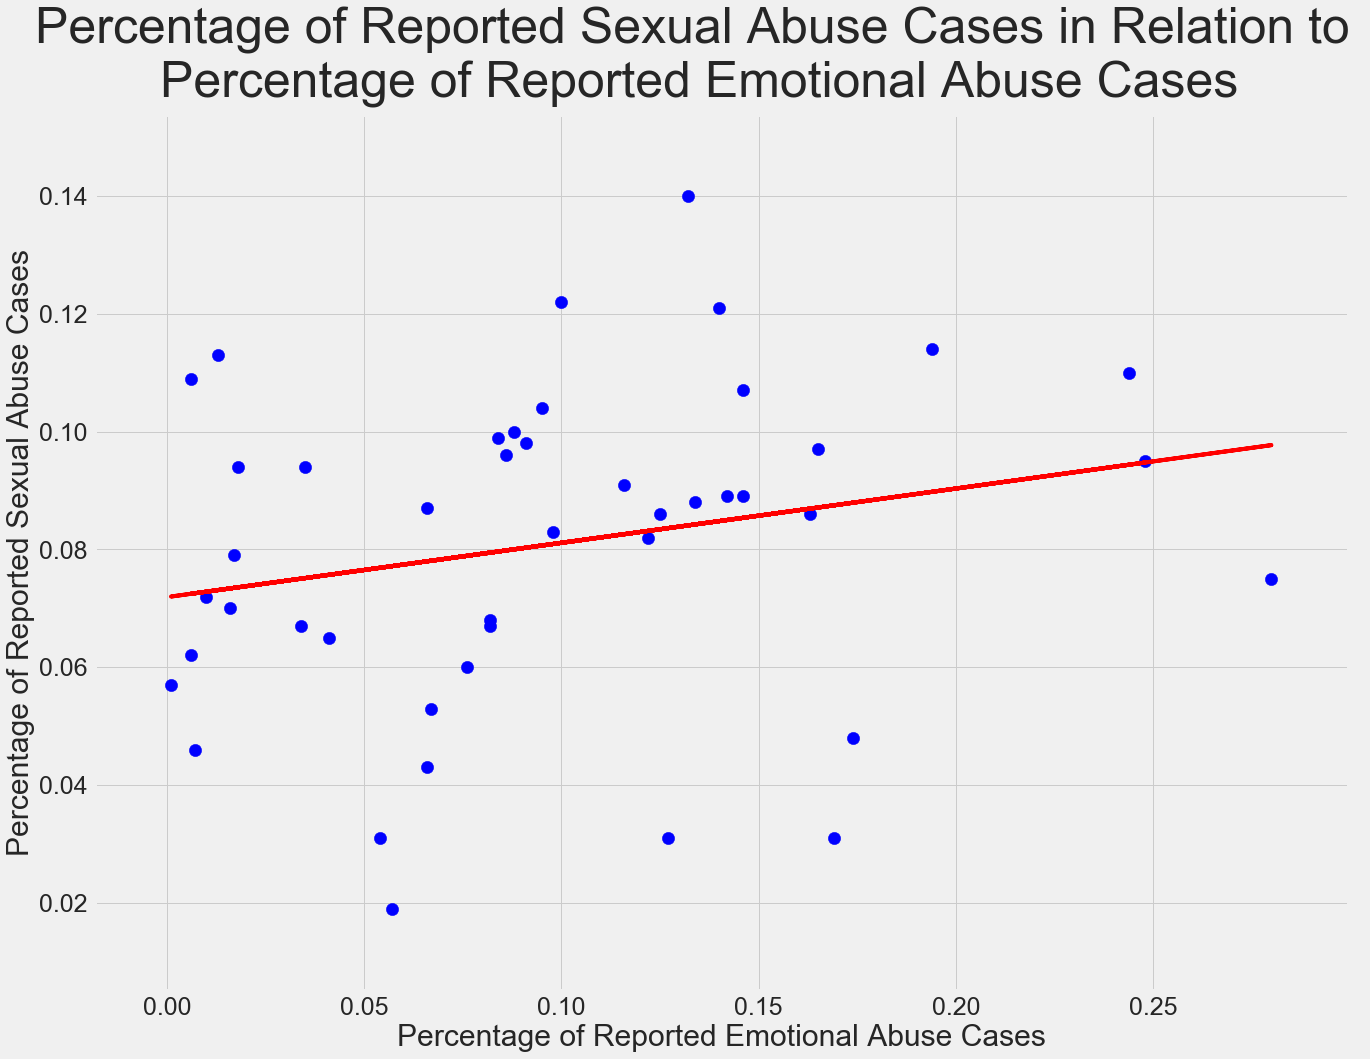

In [14]:
b, a, r, p,s = plot(x4,y4,"Percentage of Reported Emotional Abuse Cases", "Percentage of Reported Sexual Abuse Cases", "plot1")

In [15]:
x5 = df["Emotional_Abuse"][1:]
y5 = df["Students_Not_Completing_High_School"][1:]

LinregressResult(slope=28.88739178628083, intercept=8.0414291030323746, rvalue=0.25655173294665062, pvalue=0.08890997339927241, stderr=16.596431383004273)


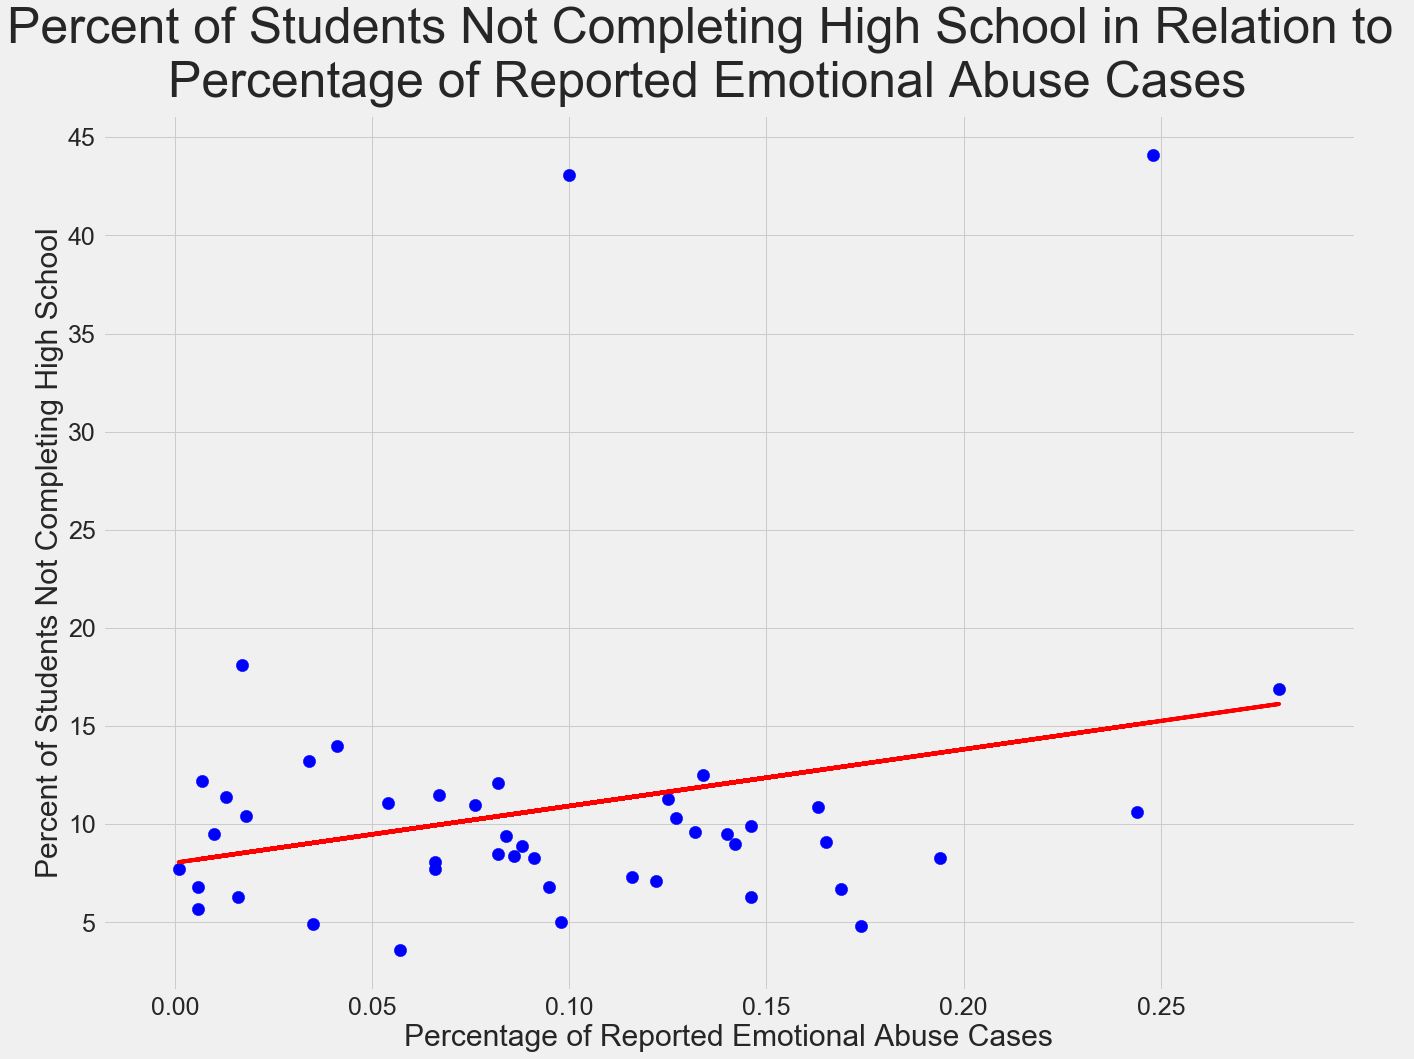

In [16]:
b, a, r, p,s = plot(x5,y5,"Percentage of Reported Emotional Abuse Cases", "Percent of Students Not Completing High School", "plot1")

In [17]:
x6 = df["Sexual_Abuse"][1:]
y6 = df["Students_Not_Completing_High_School"][1:]

In [ ]:
x7 = df["Severe_Neglect"][1:]
y7 = df["Hospitalizations_for_Mental_Health"][1:]

In [ ]:
b, a, r, p,s = plot(x7,y7,"Percentage of Reported Severe Neglect Cases", "Percentage of Hospitalizations for Mental Health", "plot1")

# Percentage of Hospitalizations for Mental Health in Relation to Percetage of Reported Physical Abuse Cases

In [ ]:
b, a, r, p,s = plot(x1,y1,"Percentage of Reported Physical Abuse Cases", "Percent of Hospitalizations for Mental Health", "plot1")

In [ ]:
figure = plt.figure(figsize = (20,15))
x_label = "Percentage of Reported Physical Abuse Cases"
y_label = "Frequency"
plt.hist(x1, bins = 15, rwidth = .9, color = 'blue')
plt.xlabel(x_label, fontsize = '30')
plt.ylabel(y_label, fontsize = '30')
plt.tick_params(axis = 'y', labelsize = 25)
plt.tick_params(axis='x', labelsize=25)
figure.suptitle("Distribution of Percentage of Reported Physical Abuse Cases", fontsize=50)
figure.savefig(str("Hist_x1.png"), dpi = 300)


In [ ]:
figure = plt.figure(figsize = (20,15))
x_label = "Percentage of Hospitalizations for Mental Health"
y_label = "Frequency"
plt.hist(y1, bins = 15, rwidth = .9, color = 'blue')
plt.xlabel(x_label, fontsize = '30')
plt.ylabel(y_label, fontsize = '30')
plt.tick_params(axis = 'y', labelsize = 25)
plt.tick_params(axis='x', labelsize=25)
figure.suptitle("Distribution of Percentage of Hospitalizations for Mental Health", fontsize=50)
figure.savefig(str("Hist_x2.png"), dpi = 300)
